参考サイト  
①https://qiita.com/FukuharaYohei/items/ec6dce7cc5ea21a51a82  
②https://itport.cloud/?p=6983

In [2]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model

#動画を読込み
#カメラ等でストリーム再生の場合は引数に0等のデバイスIDを記述する
video = cv2.VideoCapture(0)
 
cascade_path = "haarcascade_frontalface_default.xml"
cascade = cv2.CascadeClassifier(cascade_path)
model = load_model('weights.16.hdf5')
model_1 = load_model('age.hdf5')

while video.isOpened():
    # フレームを読込み
    ret, frame = video.read()
 
    # フレームが読み込めなかった場合は終了（動画が終わると読み込めなくなる）
    if not ret: break
    # 顔検出
    facerect = cascade.detectMultiScale(frame, scaleFactor=1.1, minNeighbors=2, minSize=(30, 30))
     
    # 矩形線の色
    rectangle_color = (0, 255, 0) #緑色
 
    # 顔を検出した場合
    if len(facerect) > 0:
        for rect in facerect:
            cv2.rectangle(frame, tuple(rect[0:2]),tuple(rect[0:2] + rect[2:4]), rectangle_color, thickness=2)
            
            # 顔部分の抽出
            cut_frame = frame[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
            
            # img[top : bottom, left : right]
            # サンプル1の切り出し、保存
            cv2.imwrite("out_sample1.jpg", cut_frame)

            # input test image
            img = load_img("out_sample1.jpg", color_mode='rgb', target_size=(200, 200))
            img = img_to_array(img) 
            img = img.astype('float32')/255
            img = np.array([img])
        
            # predict test image
            y_pred = model.predict(img)    
            number_pred = np.argmax(y_pred)
            y_pred_1 = model_1.predict(img)    
            number_pred_1 = np.argmax(y_pred)
            
            font = cv2.FONT_HERSHEY_SIMPLEX
            
            if number_pred == 0:
                cv2.putText(frame,'Men',(rect[1],rect[1]+rect[3]), font, 1,(255,255,255),2,cv2.LINE_AA)
                
            elif number_pred == 1:
                cv2.putText(frame,'Women',(rect[1],rect[1]+rect[3]), font, 1,(255,255,255),2,cv2.LINE_AA)
                
            else:
                cv2.putText(frame,'?',(rect[0],rect[0]+rect[2]), font, 1,(255,255,255),2,cv2.LINE_AA)
            
            if number_pred_1 == 0:
                cv2.putText(frame,'1-10',(rect[0],rect[0]+rect[2]), font, 1,(255,255,255),2,cv2.LINE_AA)
                
            elif number_pred_1 == 1:
                cv2.putText(frame,'11-20',(rect[0],rect[0]+rect[2]), font, 1,(255,255,255),2,cv2.LINE_AA)
            
            elif number_pred_1 == 2:
                cv2.putText(frame,'21-30',(rect[0],rect[0]+rect[2]), font, 1,(255,255,255),2,cv2.LINE_AA)
            
            elif number_pred_1 == 3:
                cv2.putText(frame,'31-40',(rect[0],rect[0]+rect[2]), font, 1,(255,255,255),2,cv2.LINE_AA)
            
            elif number_pred_1 == 4:
                cv2.putText(frame,'41-50',(rect[0],rect[0]+rect[2]), font, 1,(255,255,255),2,cv2.LINE_AA)
            
            elif number_pred_1 == 5:
                cv2.putText(frame,'51-60',(rect[0],rect[0]+rect[2]), font, 1,(255,255,255),2,cv2.LINE_AA)
            
            elif number_pred_1 == 6:
                cv2.putText(frame,'41-50',(rect[0],rect[0]+rect[2]), font, 1,(255,255,255),2,cv2.LINE_AA)
                
            else:
                cv2.putText(frame,'?',(rect[0],rect[0]+rect[2]), font, 1,(255,255,255),2,cv2.LINE_AA)
            
          
        
        # 縮小→復元画像で元の画像と置換
#             frame[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]=cut_frame
 
 
    # フレームの描画
    cv2.imshow('frame', frame)
 
    # qキーの押下で処理を中止
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'): break
 
#メモリの解放
video.release()
cv2.destroyAllWindows()

Using TensorFlow backend.


[[0.16045721 0.83954287]]
1


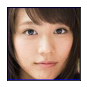

In [12]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model


model = load_model('weights.16.hdf5')
# input test image
img = load_img("out_sample1.jpg", color_mode='rgb', target_size=(200, 200))
img = img_to_array(img) 
img = img.astype('float32')/255
img = np.array([img])

# show test image
image = mpimg.imread("out_sample1.jpg")
plt.subplot(1,4,1)
plt.tick_params(labelbottom=False, bottom=False)
plt.tick_params(labelleft=False, left=False)
implot = plt.imshow(image)

# predict test image
y_pred = model.predict(img)    
number_pred = np.argmax(y_pred)
print(y_pred)
print(number_pred)

In [11]:
# 顔部分の検出
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

img = cv2.imread('IM.JPG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    cut_frame = img[y:y+h,x:x+w]
            
        
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("out_sample1.jpg", cut_frame) 

True